In [1]:
# the jupyter specific part
import ipywidgets as widget

# the functional part
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.stats import gaussian_kde

def banana_plot(ax,d,compression=5):
    res = np.power(4,compression)
    x =  - np.squeeze(d[lw_o].values)[::res]
    y = np.squeeze(d[sw_i].values)[::res] / np.squeeze(d[sw_o].values)[::res]

    y = y[np.logical_not(np.isnan(y))]
    x = x[np.logical_not(np.isnan(x))]
    
    density_plot(ax,x,y)
    
    
def density_plot(ax, x, y):  
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, s=2, cmap='cividis_r') # cmap='magma_r') # cmap='YlGnBu') # cmap='PuBu') 


if __name__ == "__main__":
    print("module: OLR vs Albedo")

module: blaz banana


Turbeville, Samantha M. The Life Cycle of TTL Cirrus: A Model Evaluation Using the DYAMOND Simulations. Diss. University of Washington, 2021.
> We use joint albedo-OLR histograms to characterize the cloud populations along with their
TOA radiation balance in each model and the observations. Introduced by Hartmann and
Short (1980), this histogram acts as a proxy for the cirrus life cycle. As the clouds progress
from thick to thin (high FWP to low FWP), they follow a specific path in the albedo-OLR
plane (Hartmann & Berry, 2017). An individual cirrus cloud layer may follow this life cycle
path in the albedo-OLR plane (Gasparini et al., 2019). However, our proxy does not make
the assumption of following individual cloud systems, but rather it is a statistical comparison
between models and observations, revealing the behavior of clouds in each.


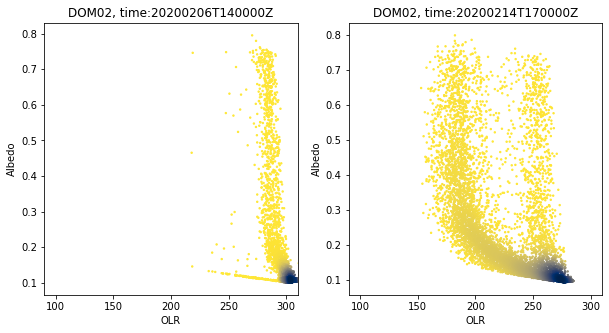

In [2]:
water = 'tqc_dia'
cloud = 'tqv_dia'
sw_i  = 'sou_t'
sw_o  = 'sod_t'
lw_o  = 'thb_t'

dirname  = '/work/mh0010/m300408/DVC-test/EUREC4A-ICON/EUREC4A/experiments/EUREC4A/'
filename = 'EUREC4A_DOM02_radiation_20200214T140000Z.nc'
filemask  = "{dirname}EUREC4A_DOM{domain}_radiation_{timestamp}.nc"




def banana_plot_eureca(ax, domain, timestamp, 
                       dirname='/work/mh0010/m300408/DVC-test/EUREC4A-ICON/EUREC4A/experiments/EUREC4A/',
                       filemask="{dirname}EUREC4A_DOM{domain}_radiation_{timestamp}.nc"):
    path = filemask.format(dirname=dirname, domain=domain, timestamp=timestamp)
    d = xr.open_dataset(path).isel({'time': slice(0,1)})
    if domain == '02':
        compression = 5
    elif domain == '01':
        compression = 4
    banana_plot(ax,d,compression)
    ax.set_xlabel('OLR')
    ax.set_ylabel('Albedo')
    ax.set_xlim(90,310)
    ax.set_title(f"DOM{domain}, time:{timestamp}")

    

fig, axs = plt.subplots(1,2,figsize=(10,5))

domain    = '02'
timestamp = '20200206T120000Z'
timestamp = '20200206T140000Z'
    
banana_plot_eureca(axs[0], domain, timestamp)
domain    = '01'
domain    = '02'
timestamp = '20200206T120000Z'

timestamp = '20200206T140000Z'
timestamp = '20200214T170000Z'
banana_plot_eureca(axs[1], domain, timestamp)

fig.savefig("banana_02_start-end.png", dpi=400)


### TO DO

 * compare to CERES
 * compare to DYAMOND

In [43]:
#ds = xr.open_mfdataset(dirname + "*DOM01*radiation*.nc")
ds = xr.open_mfdataset(dirname + "*DOM01*radiation*.nc", combine='nested', concat_dim='time')

sw_i  = 'sou_t'
sw_o  = 'sod_t'
lw_o  = 'thb_t'

su = ds['sou_t'].mean(dim='ncells')
sd = ds['sod_t'].mean(dim='ncells')
lu = ds['thb_t'].mean(dim='ncells')

Text(0, 0.5, '[$W \\cdot m^2$] TOA')

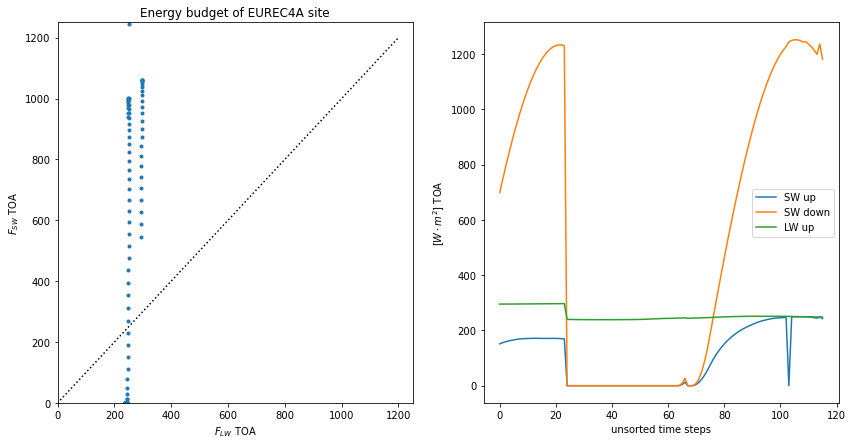

In [53]:
size = 7
fig, axs = plt.subplots(1,2,figsize=(size*2,size))

ax = axs[0]
ax.scatter( - ds['thb_t'].mean(dim='ncells'), sd.values - su.values, marker='.')
ax.plot(np.linspace(0,1200,10),np.linspace(0,1200,10), color="black", linestyle="dotted")
ax.set_title('Energy budget of EUREC4A site')
ax.set_xlabel('$F_{LW}$ TOA')
ax.set_ylabel('$F_{SW}$ TOA')
ax.set_xlim(0,1250)
ax.set_ylim(0,1250)

ax = axs[1]
ax.plot( su.values, label='SW up')
ax.plot( sd.values, label='SW down')
ax.plot(-lu.values, label='LW up')
ax.legend()
ax.set_xlabel('unsorted time steps')
ax.set_ylabel('[$W \cdot m^2$] TOA')

In [ ]:
# Remove duplicate timestamps to enable indexing
#data = data.isel(time=np.unique(data.time, return_index=True)[1])